# Lesson 15 - Random Number Generation

### The following topics are discussed in this notebook:
* Sampling from a list or array. 
* Generating random numbers according to a distribution.
* Setting seeds.


## Introduction

In this lesson, we will learn how to ask Python to generate random numbers. Although base Python has the ability to generate random numbers, this functionality is extended in NumPy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Random Sampling

The `numpy.random.choice()` function in NumPy can be use to randomly generate samples. The parameters for this function are as follows:

* **a:** An array, list, or range that the sample will be drawn from. 
* **size:** The number of elements to be drawn for the sample. This can be an integer, in which case the function will return a list containing that many observations sampled from the population provided, or `None`, in which case the function will return a single value (not in a list). The default value is `None`.  
* **replace:** A boolean value that determines if elements are returned to the sample after being drawn. The default value is `True`. 
* **p:** An array or list that determines the probability of drawing each of the elements. If **p** is not specified, then all elements will be equally likely. 

Let's start with a simple example. 

In [2]:
die_roll = np.random.choice(range(1,7))
#die_roll = np.random.choice(range(1,7), size=None)
print(die_roll)

3


We can draw samples of any size. 

In [3]:
EightRolls = np.random.choice(range(1,7), size=8)
print(EightRolls)

[2 4 6 4 1 2 6 5]


Keep in mind that if we set `size=1`, we will get an array contining a single observation.

In [4]:
OneRoll = np.random.choice(range(1,7), size=1)
print(OneRoll)

[4]


By default, each value in `a` is equally likely to be drawn for any given observation. We can use the `p` parameter to specify the probability of individual values being drawn.

In [5]:
LoadedDie = np.random.choice(range(1,7), size=10, p=[0.5, 0.2, 0.1, 0.1, 0.05, 0.05])
print(LoadedDie)

[2 6 1 1 1 2 6 1 1 1]


We can also generate observations drawn from non-numerical lists. 

In [6]:
mySample = np.random.choice(['A', 'B', 'C'], size=10)
print(mySample)

['A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'C']


If we set `replace=False`, then each value in `a` will only be able to selected at most once for the sample.

In [7]:
names = ['Anna', 'Beth', 'Chad', 'Drew', 'Emma', 'Fred', 'Gary', 'Hana', 'Iris', 'Jake']
group = np.random.choice(names, size=5, replace=False)
print(group)

['Anna' 'Chad' 'Gary' 'Jake' 'Fred']


## Example: Simulating the Distribution of Die Rolls

In this example, we will simulate a die roll being rolled many times. We will count the number of times each value was rolled, and will generate a bar chart to graphically summarize the results. 

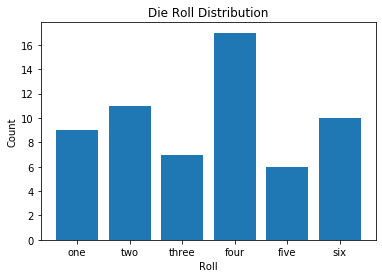

In [8]:
ManyRolls = np.random.choice(range(1,7), 60)

n1 = sum(ManyRolls == 1)
n2 = sum(ManyRolls == 2)
n3 = sum(ManyRolls == 3)
n4 = sum(ManyRolls == 4)
n5 = sum(ManyRolls == 5)
n6 = sum(ManyRolls == 6)

RollDist = [n1, n2, n3, n4, n5, n6]
labels = ['one', 'two', 'three', 'four','five', 'six']

plt.bar(labels, RollDist)
plt.xlabel('Roll')
plt.ylabel('Count')
plt.title('Die Roll Distribution')
plt.show()

## Using Simulation to Estimate Probabilities

Assume that we are interested in calculating the probability of a certain outcome of a statistical experiment, but that this particular probability is difficult, or perhaps even impossible, to calculate directly. We can sometimes estimate such probabilities using simulation. To use this approach, we would first write code that simulates the outcome of the experiment, and then run the experiment a very large number of times and count the number of simulated experiments that resulted in the outcome of interest. The proportion of experiments resulting in this outcome is an estimate of the probability of the outcome occurring. 

## Example: Coin Flipping

Assume that we are interested in know the probability of getting a certain number of "Heads" in 50 coin flips. This is a very common problem to encounter in an introductory Statistics course, and is solvable using basic probability techniques. However, we will estimate the answer using simulation. 

We will first write a function that simulates a sequence of 50 coin flips. 

In [9]:
def flip_50():
    return np.random.choice(['H','T'], 50)

In [10]:
print(flip_50())

['T' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'T' 'T' 'H' 'H' 'T'
 'T' 'T' 'H' 'T' 'H' 'T' 'T' 'T' 'H' 'H' 'T' 'T' 'H' 'H' 'H' 'T' 'H' 'T'
 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'T' 'T' 'H' 'T' 'T' 'H' 'T']


Now, we will run this simulation 100,000 times. After each simulation, we will count the number of heads in the sequence, and will record this number in a list. Finally, we will convert this list to an array. 

In [11]:
num_heads = []

for i in range(0,100000):
    seq = flip_50()
    count = np.sum(seq == 'H')
    num_heads.append(count)
    
num_heads = np.array(num_heads)

Suppose we want to estimate the probability of getting 20 or fewer heads in 50 flips. The code below provides such an estimate. The true value of this probability is approximately 0.101319.

In [12]:
prob_20_or_fewer = np.mean(num_heads <= 20)
print(prob_20_or_fewer)

0.10376


We can graphically represent the probabilities of getting any specific number of heads with a histogram. 

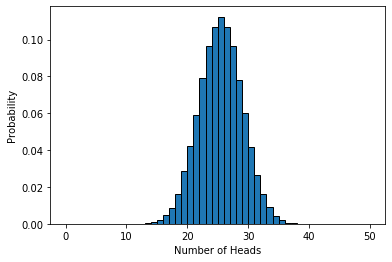

In [13]:
plt.hist(num_heads, bins=range(0,51), density=True, edgecolor='black')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()

## Example: Random Walks

A random walk is a path that consists of several consecutive steps taken in a random direction. The size of the steps could be random, or it could be preset. Random walks have many applications in fields such as computer science, physics, biology, chemistry, and economics. 

We will consider perhaps the most basic example of a random walk. In this example, the position is recorded as a single integer, and the starting position is 0. At each step, we either move by an amount of either +1 or -1, with equal probability.

In [14]:
def random_walk(start = 0, n = 1000):
    
    steps = np.random.choice([-1,1], n)
    path = start + np.cumsum(steps)
    path = np.concatenate(([start], path))
        
    return path

Let's print the path of random walk starting at 10 and having 20 steps.

In [15]:
print(random_walk(10, 20))

[10 11 12 13 12 11 10  9  8  7  6  5  6  7  8  7  8  9 10  9 10]


The code below will plot a random walk starting at 50 and consisting of 100 steps. Run it several times. 

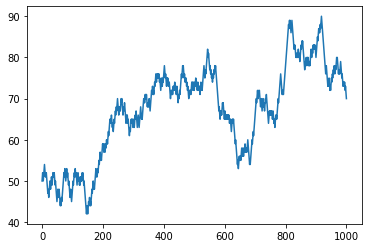

In [16]:
plt.plot(random_walk(50, 1000))
plt.show()

In the following cell, we will plot five random walks starting at 0 and with 1000 steps. 

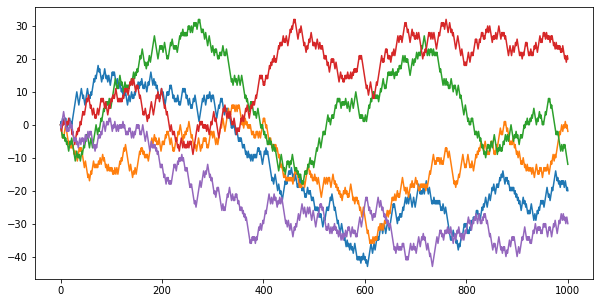

In [17]:
fig=plt.figure(figsize=(10, 5))

plt.plot(random_walk())
plt.plot(random_walk())
plt.plot(random_walk())
plt.plot(random_walk())
plt.plot(random_walk())
plt.show()

## Example: Stock Price Simulation

In this next example, we will create a function that simulates a sequence of several daily prices for a stock. We will assume that the stock price will see a percentage change equal to one of the following amounts each day:

    -0.5%, -0.4%, -0.3%, -0.2%, -0.1%, 0%, 0.1%, 0.2%, 0.3%, 0.4%, 0.5% 
    
Assume further that each of these changes is equally likely. 

In [18]:
def sim_stock(start=100, n=100):
    rate_choices = [-0.005, -0.004, -0.003, -0.002, -0.001, 0, 0.001, 0.002, 0.003, 0.004, 0.005]
    daily_rates = np.random.choice(rate_choices, n)
    daily_multiplier = 1 + daily_rates
    cum_multiplier = np.cumproduct(daily_multiplier)
    daily_prices = start*cum_multiplier
    daily_prices = np.concatenate(([start], daily_prices))
    return np.round(daily_prices,2)

Let's generate a sequence of 10 simulated daily prices for a stock currently work 50. 

In [19]:
print(sim_stock(start=50, n=10))

[50.   49.75 50.   49.8  49.65 49.65 49.7  49.75 49.9  49.75 49.75]


In the cell below we plot the simulated daily prices of a stock currently worth 100 over the course of a year. 

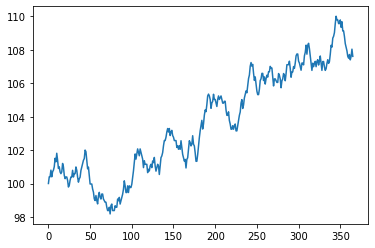

In [20]:
plt.plot(sim_stock(100, 365))
plt.show()

To get a sense of the range of possible outcomes for our stock model after one year, let's plot 1000 simulated sequences, or runs, of daily stock prices.

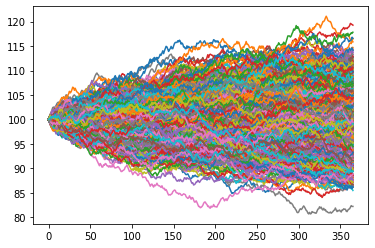

In [21]:
for i in range(1000):
    plt.plot(sim_stock(100, 365))
plt.show()

Assuming that our stock model is correct, let's estimate the probability that the stock will be work 105 after one year. 

In [22]:
final_prices = []
for i in range(100000):
    run = sim_stock(100,365)
    final_prices.append(run[-1])
final_prices = np.array(final_prices)

print(np.mean(final_prices > 105))

0.20089


We might be interested in estimating a probability such as the one above if we are considering a certain type of investment whose value is based on the price of the stock after one year. For example, a **call option** is a type of financial instrument that will provide its purchaser with a positive payoff if the value of the stock is greater than a certain pre-determined value at the end of a specified period. 

## Sampling from Statistical Distributions

Numpy also provides us with tools for sampling from various probability distributions. We will discuss how to sample from the uniform, normal, and gamma distributions. 

## The Uniform Distribution

If a random variable follows a **uniform distribution** on an interval `[a,b]`, then the result of the randomly generated value for the variable can take on any value from the interval `[a,b]`, and is just as likely to come from one portion of the interval as any other. 

We can use the function `np.random.uniform()` to sample from a uniform distribution. 

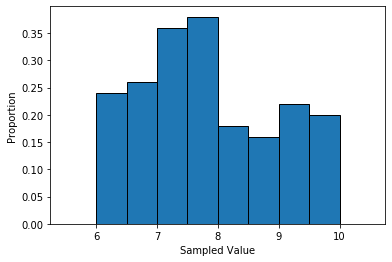

In [23]:
unif_sample = np.random.uniform(low=6, high=10, size=100)

plt.hist(unif_sample, bins=np.arange(5.5,11,0.5), density=True, edgecolor='black')
plt.xlabel('Sampled Value')
plt.ylabel('Proportion')
plt.show()

## The Normal Distribution

A **normal distribution** is defined by two numbers: A mean $\mu$ and a standard deviation $\sigma$. If a random variable follows a normal distribution, then it can take on any real number as its value, but the observed values will tend to fall close to the mean $\mu$. The parameter $\sigma$ determines how likely it is that observations will fall close to the mean. Small values of $\sigma$ will result in observations that are clustered very near the mean, while large values of $\sigma$ will result in observations being more spread out. 

We can use the function `np.random.normal()` to sample from a normal distribution. 


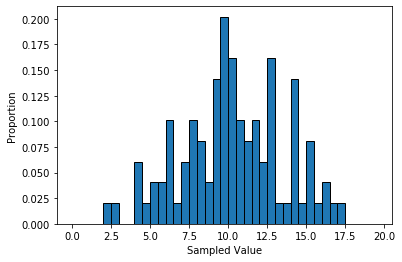

In [24]:
norm_sample = np.random.normal(loc=10, scale=3, size=100)

plt.hist(norm_sample, bins=np.arange(0,20,0.5), density=True, edgecolor='black')
plt.xlabel('Sampled Value')
plt.ylabel('Proportion')
plt.show()

Let's use 1,000,000 simulated values to estimate probabilities associated with the normal distribution. 

In [25]:
X = np.random.normal(loc=10, scale=2, size=1000000)

print('Prob[X < 10] = ', np.mean(X < 10))
print('Prob[X < 12] = ', np.mean(X < 12))
print('Prob[8 < X < 12] =', np.mean((X > 8) & (X < 12)))
print('Prob[6 < X < 14] =', np.mean((X > 6) & (X < 14)))
print('Prob[4 < X < 16] =', np.mean((X > 4) & (X < 16)))


Prob[X < 10] =  0.500115
Prob[X < 12] =  0.841141
Prob[8 < X < 12] = 0.682588
Prob[6 < X < 14] = 0.954535
Prob[4 < X < 16] = 0.997345


In the cell below, we sample 10,000 observations each from three different normal distrubutions, and then plot the results. This illustrates the effects that the loc (mean) and scale (standard deviation) parameters have on the shape of the distribution. 

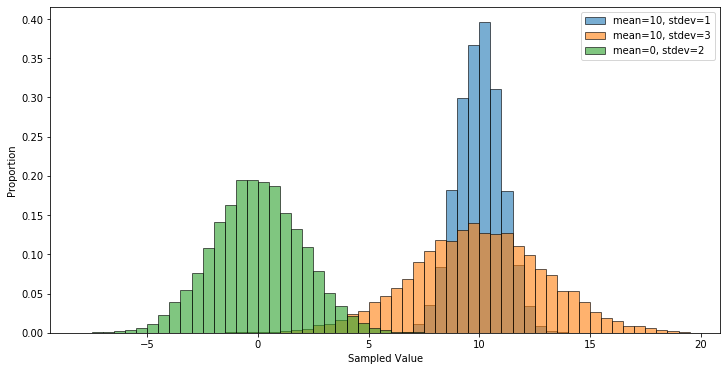

In [26]:
norm_sample_1 = np.random.normal(loc=10, scale=1, size=10000)
norm_sample_2 = np.random.normal(loc=10, scale=3, size=10000)
norm_sample_3 = np.random.normal(loc=0, scale=2, size=10000)

fig=plt.figure(figsize=(12, 6))
plt.hist(norm_sample_1, bins=np.arange(-8,20,0.5), density=True, 
         edgecolor='black', alpha=0.6, label="mean=10, stdev=1")
plt.hist(norm_sample_2, bins=np.arange(-8,20,0.5), density=True, 
         edgecolor='black', alpha=0.6, label="mean=10, stdev=3")
plt.hist(norm_sample_3, bins=np.arange(-8,20,0.5), density=True, 
         edgecolor='black', alpha=0.6, label="mean=0, stdev=2")
plt.xlabel('Sampled Value')
plt.ylabel('Proportion')
plt.legend()
plt.show()

## The Gamma Distribution

If a random variable follows a **Gamma Distribution**, then it can take on any positive value, and have a right-skew, meaning that very large values are possible, but rare. Gamma distributions are often used to model the amount of time until an event, such as the failure of a mechanical device, or until an earthquake. 

We can use the function `np.random.gamma()` to sample from a gamma distribution. 

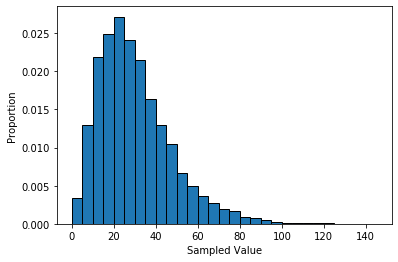

In [27]:
gamma_sample = np.random.gamma(shape=3, scale=10, size=10000)

plt.hist(gamma_sample, bins=np.arange(0,150,5), density=True, edgecolor='black')
plt.xlabel('Sampled Value')
plt.ylabel('Proportion')
plt.show()

## Pseudorandom Numbers and Seeds

The numbers generated by functions in `np.random` are not truly random. Typical computers are simply not capable of "true" randomness. The numbers generated by functions in `np.random` are obtained from a **pseudorandom number generator**. 

Pseudorandom number generators create sequences of numbers that satisfy certain statistical properties that we would expect from "truly random" numbers. The sequences are algorithmically generated from a base value, which is called the **seed**. To ensure that the results are different each time, a pseudorandom number generator will typically use a source such as the computer's system clock to seed the algorithm. However, we are able to set the seed ourselves manually. This unsures that we get the same "random" results each time we run a code involving pseudorandom numbers. This is useful for occasions when we want to generate results that behave randomly, but are reproducible. 

We can set the seed for the numpy pseudorandom number generator using the function `np.random.seed()`. 


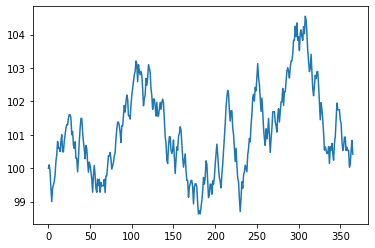

In [28]:
np.random.seed(137)
plt.plot(sim_stock(100, 365))
plt.show()